In [34]:
! pip install pandas
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 2.9 MB/s eta 0:00:003.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.1 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.7 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.8 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 5.5 MB/s eta 0:00:00


In [35]:
## Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Question No 1

In [6]:
# Importing the dataset from the provided address
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(dataset_url, sep='|', index_col='user_id')

# Finding mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Finding Male ratio per occupation and sorting it
male_ratio_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
male_ratio_per_occupation['male_ratio'] = male_ratio_per_occupation['M'] / (male_ratio_per_occupation['M'] + male_ratio_per_occupation['F'])
sorted_male_ratio = male_ratio_per_occupation['male_ratio'].sort_values(ascending=False)

# For each occupation, calculating the minimum and maximum ages
min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# For each combination of occupation and gender, calculating the mean age
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()

# For each occupation, present the percentage of women and men
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_per_occupation['female_percentage'] = (gender_percentage_per_occupation['F'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100
gender_percentage_per_occupation['male_percentage'] = (gender_percentage_per_occupation['M'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100

# Displaying the results
print("Mean Age per Occupation:\n", mean_age_per_occupation)
print("\nMale Ratio per Occupation with sorting:\n", sorted_male_ratio)
print("\nMinimum and Maximum Ages per Occupation:\n", min_max_ages_per_occupation)
print("\nMean Age per Occupation and Gender:\n", mean_age_per_combination)
print("\nPercentage of Women and Men per Occupation:\n", gender_percentage_per_occupation)


Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation with sorting:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other

# Question No 2

In [7]:
# Importing the dataset
euro12_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(euro12_url)

# Selecting only the Goal column
goal_column = euro12['Goals']

# How many teams participated in the Euro2012?
num_teams = euro12['Team'].nunique()

# What is the number of columns in the dataset?
num_columns = euro12.shape[1]

# Viewing only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Sorting the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

# Calculating the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()

# Filtering teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Selecting the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Selecting the first 7 columns with concept of slicing and loc
first_7_columns = euro12.iloc[:, :7]

# Select all columns except the last 3
all_columns_except_last_3 = euro12.iloc[:, :-3]

# Shooting Accuracy from England, Italy, and Russia
shooting_accuracy_selected_teams = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

# Display the results
print("Goal Column:\n", goal_column)
print("\nNumber of Teams in Euro2012:", num_teams)
print("\nNumber of Columns in the Dataset:", num_columns)
print("\nDiscipline DataFrame:\n", discipline)
print("\nDiscipline DataFrame Sorted:\n", discipline_sorted)
print("\nMean Yellow Cards per Team:", mean_yellow_cards)
print("\nTeams that scored more than 6 goals:\n", teams_more_than_6_goals)
print("\nTeams starting with G:\n", teams_starting_with_G)
print("\nFirst 7 Columns:\n", first_7_columns)
print("\nAll Columns Except Last 3:\n", all_columns_except_last_3)
print("\nShooting Accuracy from England, Italy, and Russia:\n", shooting_accuracy_selected_teams)


Goal Column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of Teams in Euro2012: 16

Number of Columns in the Dataset: 35

Discipline DataFrame:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            

# Question No 3

In [19]:
# Create 3 different Series
random_number_1_to_4 = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
random_number_1_to_3 = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
series3 = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

# Create a DataFrame by joining the Series by column
df = pd.concat([random_number_1_to_4, random_number_1_to_3, series3], axis=1)

# Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Create a one column DataFrame with the values of the 3 Series
bigcolumn = pd.DataFrame(pd.concat([random_number_1_to_4, random_number_1_to_3, series3], ignore_index=True), columns=['bigcolumn'])

# Check if it goes only until index 99
print(f"Does it go only until index 99? {bigcolumn.index.max() == 99}")

# Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reindex(range(300))

print(bigcolumn.head(5))
print(bigcolumn.tail(5))


Does it go only until index 99? False
   bigcolumn
0          4
1          2
2          3
3          2
4          4
     bigcolumn
295      15789
296      28986
297      26724
298      19144
299      18841


# Question No 4

In [31]:
# Import the dataset from the attached file wind.txt
txt_file = 'wind.txt'
data = pd.read_csv(txt_file, sep='\s+', parse_dates=[[0, 1, 2]])

# Assigning it to a variable called data and replacing the first 3 columns by a proper datetime index
data = data.set_index('Yr_Mo_Dy')

# Creating a function to fix the year and applying it
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: pd.to_datetime(f"{fix_year(x.year)}-{x.month}-{x.day}"))

# Set the right dates as the index
data.index.name = 'Date'

# Compute how many values are missing for each location over the entire record
missing_values_per_location = data.isnull().sum()
print("Missing Values per Location:")
print(missing_values_per_location)
print()

# Compute how many non-missing values there are in total
total_non_missing_values = data.notnull().sum().sum()
print("Total Non-Missing Values:")
print(total_non_missing_values)
print()

# Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.mean().mean()
print("Mean Windspeed:")
print(mean_windspeed)
print()

# Create a DataFrame called loc_stats and calculate the min, max, mean, and standard deviations of the windspeeds at each location over all the days
loc_stats = data.describe().transpose()
print("Location Statistics:")
print(loc_stats)
print()

# Create a DataFrame called day_stats and calculate the min, max, mean, and standard deviations of the windspeeds across all the locations at each day
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

print("Day Statistics:")
print(day_stats)
print()

# Find the average windspeed in January for each location
january_avg_windspeed = data[data.index.month == 1].mean()
print("January Average Windspeed:")
print(january_avg_windspeed)
print()

# Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("Yearly Data:")
print(yearly_data)
print()

# Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print("Monthly Data:")
print(monthly_data)
print()

# Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()
print("Weekly Data:")
print(weekly_data)
print()

# Calculate the min, max, mean, and standard deviations of the windspeeds across all locations for each week for the first 52 weeks
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("Weekly Statistics for the First 52 Weeks:")
print(weekly_stats)



/tmp/ipykernel_9435/3603845796.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(txt_file, sep='\s+', parse_dates=[[0, 1, 2]])


Index(['RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO',
       'BEL', 'MAL'],
      dtype='object')
Missing Values per Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total Non-Missing Values:
78857

Mean Windspeed:
10.227982360836938

Location Statistics:
      count       mean       std   min    25%    50%    75%    max
RPT  6568.0  12.362987  5.618413  0.67   8.12  11.71  15.92  35.80
VAL  6571.0  10.644314  5.267356  0.21   6.67  10.17  14.04  33.37
ROS  6572.0  11.660526  5.008450  1.50   8.00  10.92  14.67  33.84
KIL  6569.0   6.306468  3.605811  0.00   3.58   5.75   8.42  28.46
SHA  6572.0  10.455834  4.936125  0.13   6.75   9.96  13.54  37.54
BIR  6574.0   7.092254  3.968683  0.00   4.00   6.83   9.67  26.16
DUB  6571.0   9.797343  4.977555  0.00   6.00   9.21  12.96  30.37
CLA  6572.0   8.495053  4.499449  0.00   5.09   8.08  11.42  31.08
MUL  6571.0   8.493590  4.166872  0

# Question No 5

In [33]:
# Import the dataset from the provided address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

# See the first 10 entries
print(chipo.head(10))
print()

# What is the number of observations in the dataset?
num_observations = len(chipo)
print("Number of observations:", num_observations)
print()

# What is the number of columns in the dataset?
num_columns = len(chipo.columns)
print("Number of columns:", num_columns)
print()

# Print the name of all the columns.
print("Column Names:", chipo.columns)
print()

# How is the dataset indexed?
print("Index:", chipo.index)
print()

# Which was the most-ordered item?
most_ordered_item = chipo['item_name'].mode().values[0]
print("Most Ordered item:", most_ordered_item)
print()

# For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of items ordered for the most-ordered item:", most_ordered_item_count)
print()

# What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].mode().values[0]
print("Most Ordered item in Choice Description:", most_ordered_choice)
print()

# How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("Total Items Ordered:", total_items_ordered)
print()

# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print()

# Check the item price type
print("Type of item price after conversion:", chipo['item_price'].dtype)
print()

# How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue for the period:", revenue)
print()

# How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("Number of orders made:", num_orders)
print()

# What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", average_revenue_per_order)
print()

# How many different items are sold?
num_unique_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_unique_items)
print()


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question No 6

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


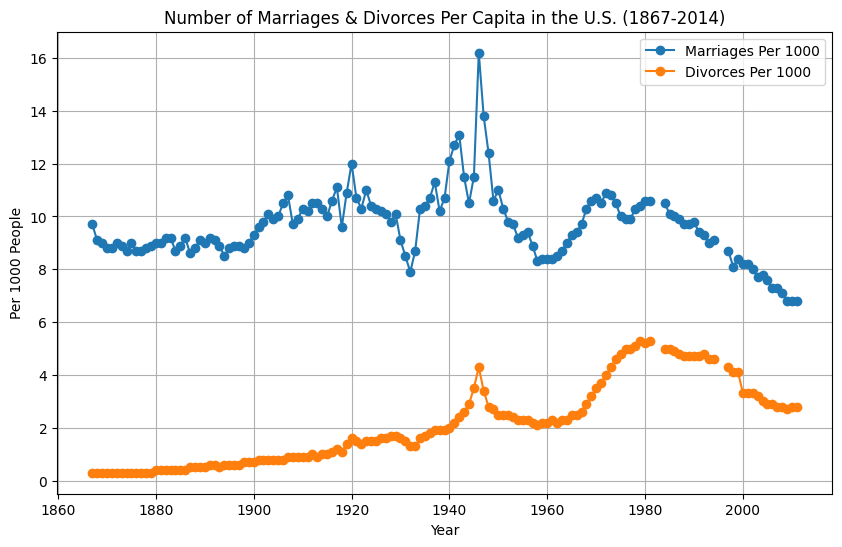

In [57]:
# Read the CSV file into a DataFrame
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

print(df.head())

# Create a line plot
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages Per 1000', marker='o')
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces Per 1000', marker='o')

# Add labels and title
plt.title('Number of Marriages & Divorces Per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Per 1000 People')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# Question No 7

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


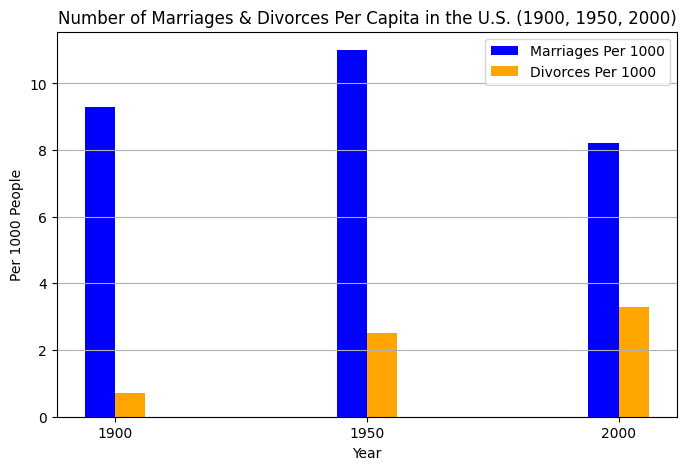

In [56]:
# Read the CSV file into a DataFrame
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

print(df.head())

# Filter the data for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
df_selected_years = df[df['Year'].isin(selected_years)]

# Create a vertical bar chart
plt.figure(figsize=(8, 5))

bar_width = 6
bar_positions_marriages = df_selected_years['Year'] - bar_width / 2
bar_positions_divorces = df_selected_years['Year'] + bar_width / 2

plt.bar(bar_positions_marriages, df_selected_years['Marriages_per_1000'], width=bar_width, label='Marriages Per 1000', color='blue')
plt.bar(bar_positions_divorces, df_selected_years['Divorces_per_1000'], width=bar_width, label='Divorces Per 1000', color='orange')

# Add labels and title
plt.title('Number of Marriages & Divorces Per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Per 1000 People')

# Show legend
plt.legend()

# Show the plot
plt.xticks(df_selected_years['Year'], df_selected_years['Year'])
plt.grid(axis='y')
plt.show()


# Question No 8

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239


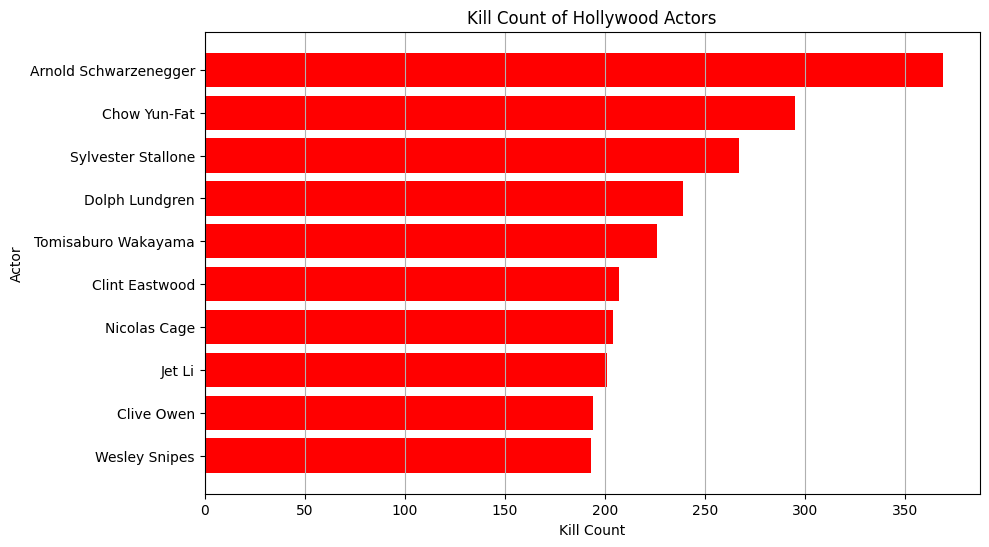

In [55]:
# Read the CSV file into a DataFrame
df = pd.read_csv('actor_kill_counts.csv')

print(df.head())

# Sort the DataFrame by the kill count
df = df.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))

plt.barh(df['Actor'], df['Count'], color='red')

# Add labels and title
plt.title('Kill Count of Hollywood Actors')
plt.xlabel('Kill Count')
plt.ylabel('Actor')

# Show the plot
plt.grid(axis='x')
plt.show()


# Question No 9

    Emperor  Length_of_Reign         Cause_of_Death
0  Augustus            40.58  Possibly assassinated
1  Tiberius            22.50  Possibly assassinated
2  Caligula             4.83           Assassinated
3  Claudius            13.75  Possibly assassinated
4      Nero            13.67                Suicide


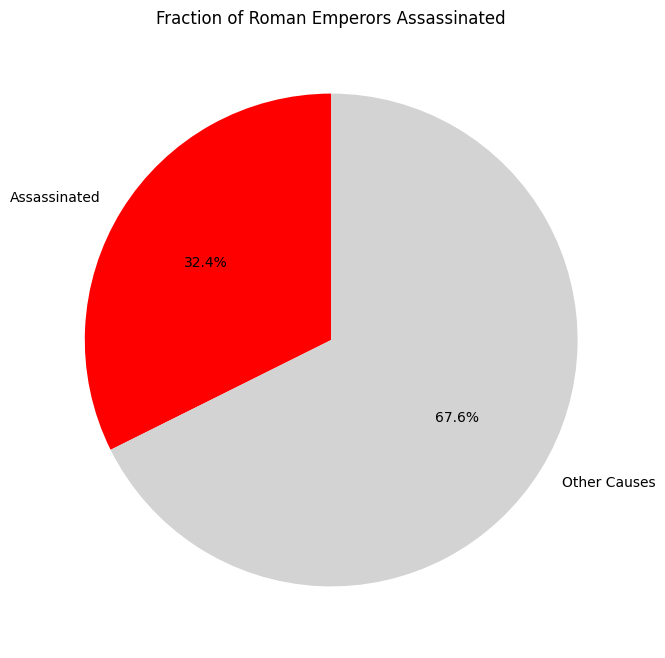

In [54]:
# Read the CSV file into a DataFrame
df = pd.read_csv('roman-emperor-reigns.csv')

print(df.head())

# Count the number of emperors who were assassinated
assassinated_count = df[df['Cause_of_Death'] == 'Assassinated'].shape[0]

# Count the number of emperors who died from other causes
natural_causes_count = df[df['Cause_of_Death'] != 'Assassinated'].shape[0]

# Create a pie chart
plt.figure(figsize=(8, 8))

# Data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, natural_causes_count]

# Colors for each category
colors = ['red', 'lightgray']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Fraction of Roman Emperors Assassinated')

# Show the plot
plt.show()


# Question No 10

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  


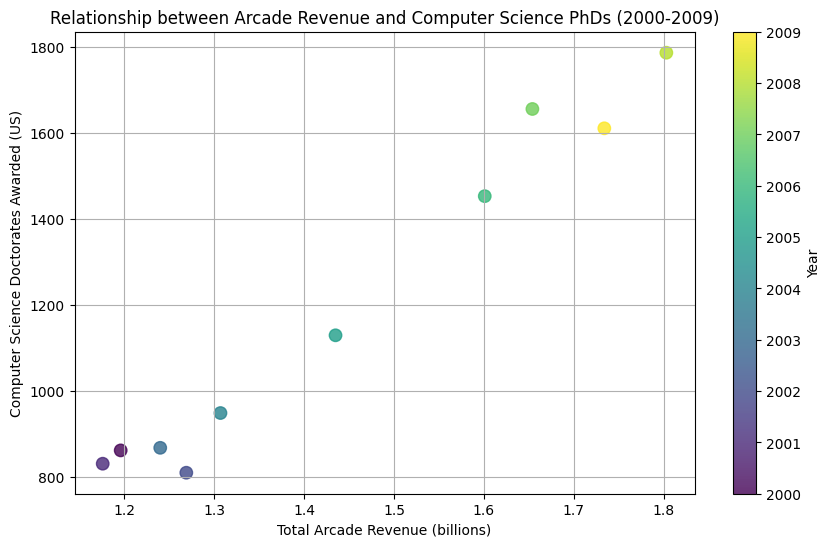

In [53]:
# Read the CSV file into a DataFrame
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

print(df.head())

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with colored points
scatter = plt.scatter(
    df['Total Arcade Revenue (billions)'],
    df['Computer Science Doctorates Awarded (US)'],
    c=df['Year'],
    cmap='viridis',
    s=80,  # Marker size
    alpha=0.8  # Transparency
)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Add labels and title
plt.title('Relationship between Arcade Revenue & Computer Science Doctorates Awarded (2000-2009)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Show the plot
plt.grid(True)
plt.show()
